In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import pymc3 as pm
import arviz as az

import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

We will demonstrate these steps with our running example with the data are the percent change in total personnel from last year to this year for $n=10$ companies. We used a normal likelihood with known variance and t distribution for the prior on the unknown mean.

1. Specify the model

$y_i | \mu \stackrel{iid}{\sim} \mathcal(\mu, 1) \text{ }i = 1, ..., n $

$ \mu \sim t(0, 1, 1) $

2. Set up the model

In [4]:
y = np.array([1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9]) # Data
y_bar = np.mean(y) # Sample mean
n = y.shape[0] # Data points

In [6]:
with pm.Model() as personnel:
    # Define priors
    df = 1
    mu = pm.StudentT("prior", nu = df, mu = 0, sd = 1)
    
    # Likelihood
    var = 1
    y_i = pm.Normal('observation', mu, var, observed = y)

3. Run the MCMC sampler

In [8]:
with personnel:
    # Use MCMC to sample 3000 samples
    trace = pm.sample(10000, tune = 1500)
    # Tune gives a number of samples to reject. These are used to calibrate the sampler. 
    # After the number of samples in tune, the following are considered useful.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 10 seconds.


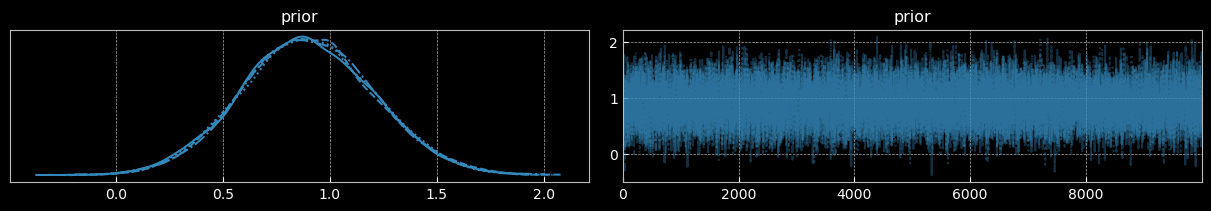

In [10]:
# Plotting posterior distribution of mu
az.plot_trace(trace)
plt.show()

The right plot is the chain trace. Left are probability distributions generated by the chain trace. There are multiple plots in order to guarantee that the chains are good (default always 2).

Note: The left plots is the posterior!

The samples mean are: 0.9899999999999999


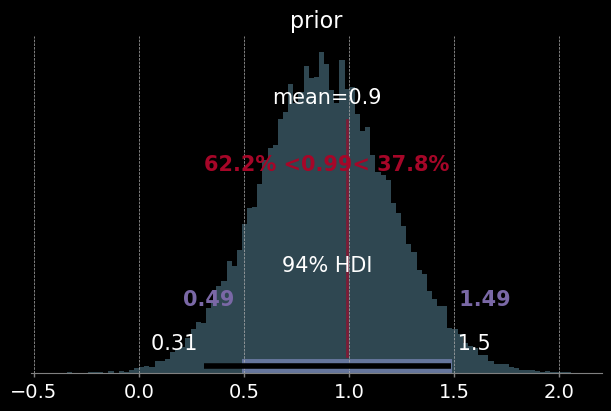

In [12]:
az.plot_posterior(trace, rope = [round(y_bar - 0.5, 2), round(y_bar + 0.5, 2)], point_estimate = 'mean', ref_val = y_bar , kind = 'hist', color= "#87ceeb")
# Rope is a region of interest
print('The samples mean are: {}'.format(y_bar))
# This is the posterior distribution of Mu (prior)

- The mean of the posterior is: 0.9

- The probability below of $ \bar{y} = 0.99$ is $0.616 % $ and above $0.384 %

- Rope is a probability space where we will be confident if the distribution is within in.

- 0.94 of the distribution is contained within $0.31$ and $1.5$

In [14]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
prior,0.896,0.312,0.311,1.483,0.002,0.002,17535.0,17535.0,17548.0,28160.0,1.0
